In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Data file.csv')
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df=pd.DataFrame(data=data)
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90',
        'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90',
        'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90'],
       dtype='object'),
 dtype('float64'): Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
        'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30',
        'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
        'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
        'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
        'medianamnt_loans90', 'payback30', 'payback90'],
       dtype='object'),
 dtype('O'): Index(['msisdn', 'pcircle', 'pdate'], dtype='object')}

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
label                   209593 non-null int64
msisdn                  209593 non-null object
aon                     209593 non-null float64
daily_decr30            209593 non-null float64
daily_decr90            209593 non-null float64
rental30                209593 non-null float64
rental90                209593 non-null float64
last_rech_date_ma       209593 non-null float64
last_rech_date_da       209593 non-null float64
last_rech_amt_ma        209593 non-null int64
cnt_ma_rech30           209593 non-null int64
fr_ma_rech30            209593 non-null float64
sumamnt_ma_rech30       209593 non-null float64
medianamnt_ma_rech30    209593 non-null float64
medianmarechprebal30    209593 non-null float64
cnt_ma_rech90           209593 non-null int64
fr_ma_rech90            209593 non-null int64
sumamnt_ma_rech90       209593 non-null int64
medianamnt_ma_rech90    209593 non-nul

In [7]:
df.shape

(209593, 36)

In [8]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [9]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

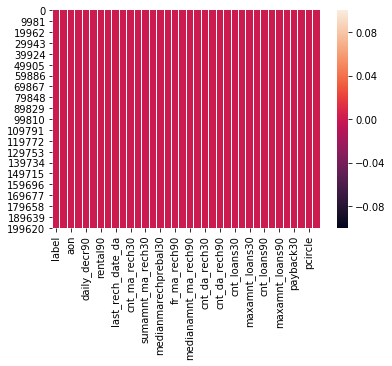

In [10]:
sns.heatmap(df.isnull())

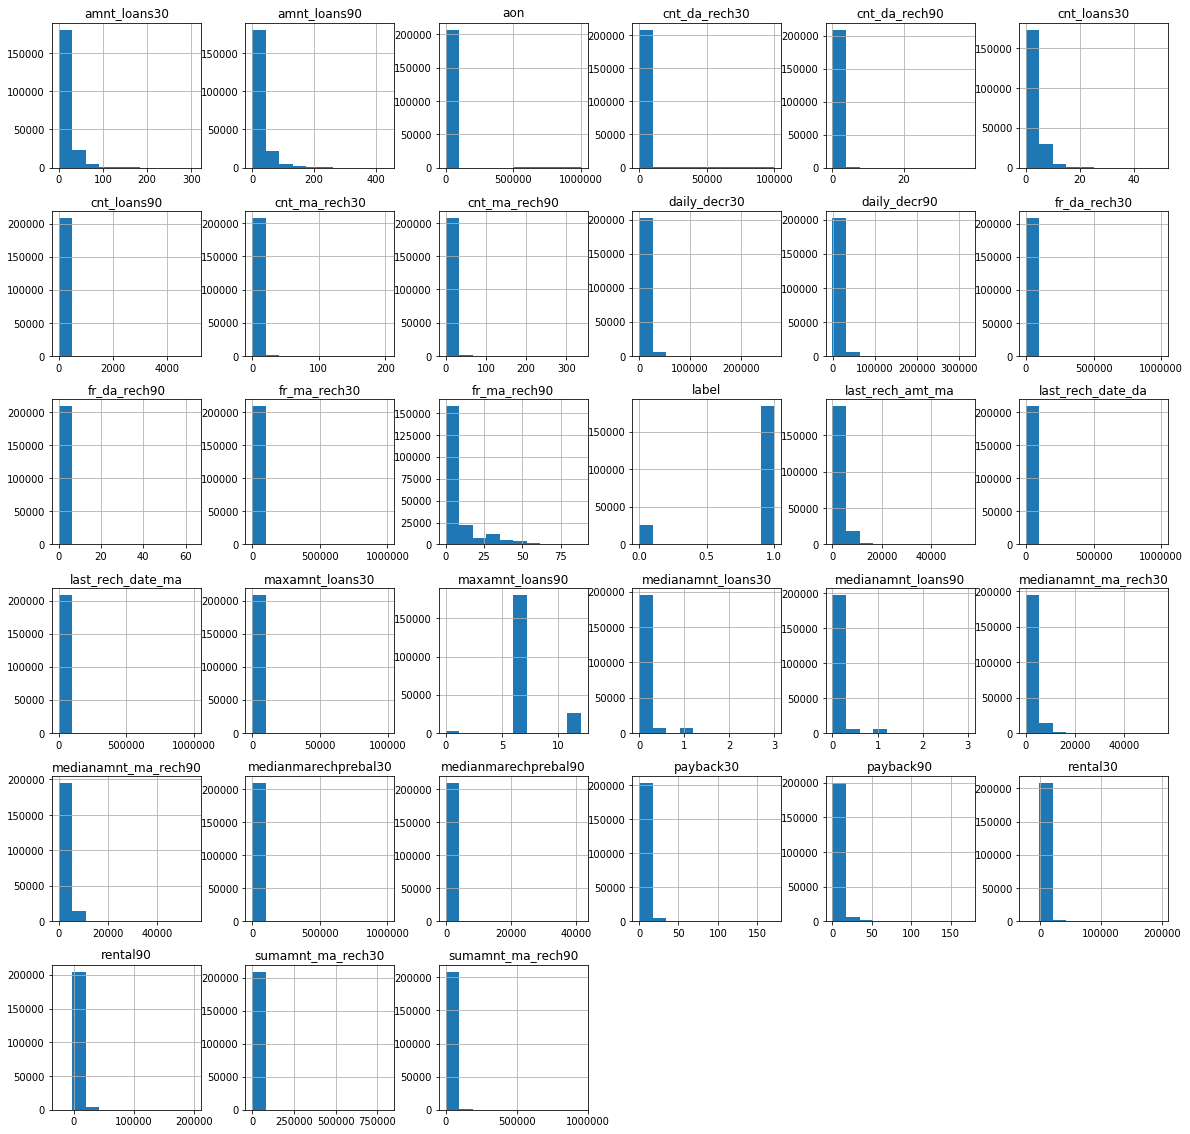

In [11]:
df.hist(figsize=(20,20))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef53f1fc48>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef53f38f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef53f34048>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef53f47048>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef53fe4a08>],
 'means': []}

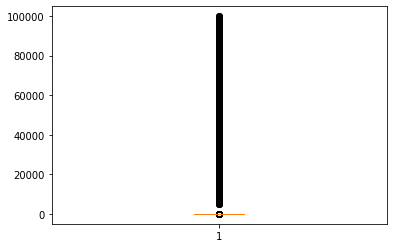

In [12]:
plt.boxplot(df['maxamnt_loans30'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef535cb808>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef535cbf08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef535c9e48>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef535cdfc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef535d0e48>],
 'means': []}

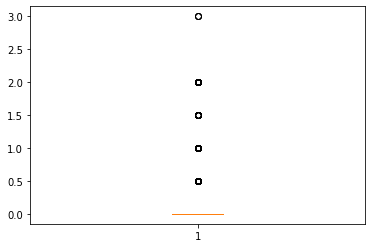

In [13]:
plt.boxplot(df['medianamnt_loans30'])

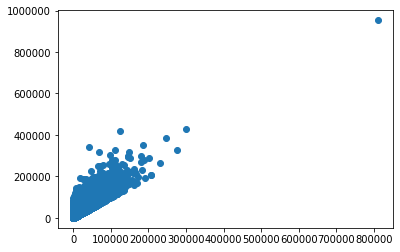

In [14]:
plt.scatter('sumamnt_ma_rech30','sumamnt_ma_rech90',data=df)

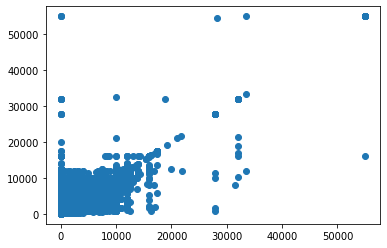

In [15]:
plt.scatter('medianamnt_ma_rech30','medianamnt_ma_rech90',data=df)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1ef53d7c408>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1ef53d54688>,
 'cmins': <matplotlib.collections.LineCollection at 0x1ef53d7cc88>,
 'cbars': <matplotlib.collections.LineCollection at 0x1ef53d7cb48>}

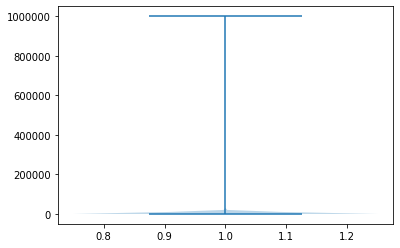

In [16]:
plt.violinplot(df['aon'])

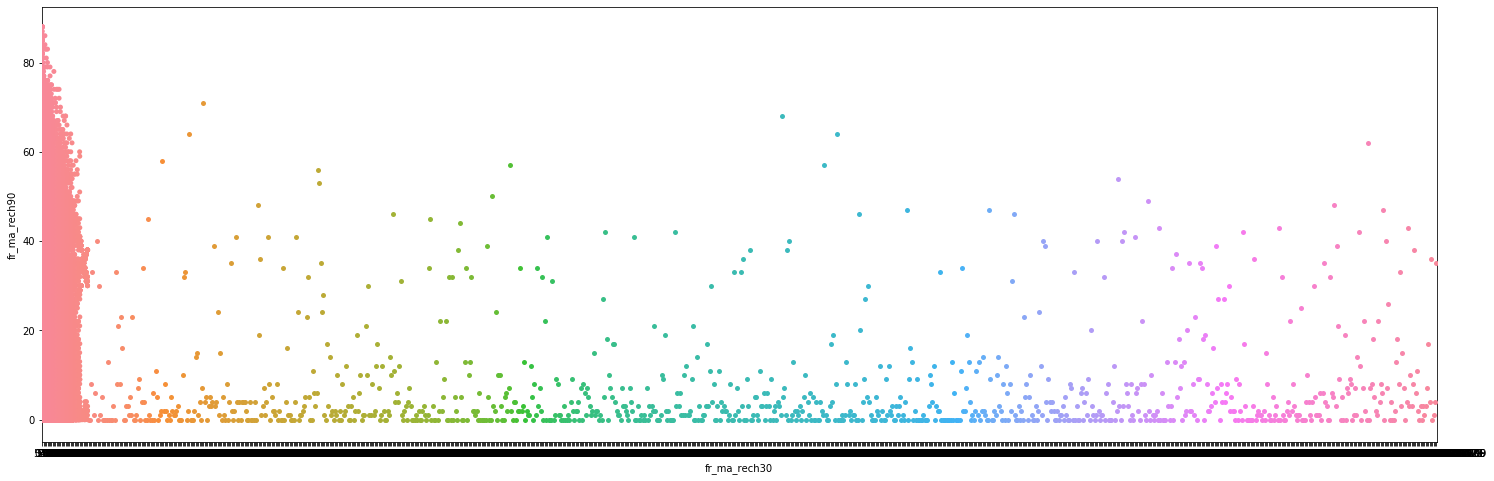

In [17]:
plt.figure(figsize=(25,8))
sns.stripplot('fr_ma_rech30','fr_ma_rech90',data=df)

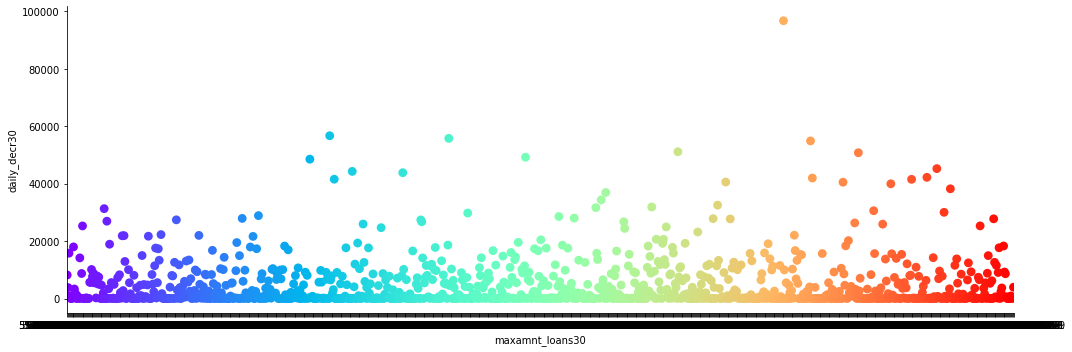

In [20]:
sns.catplot('maxamnt_loans30','daily_decr30',aspect=3,data=df,palette='rainbow',kind='point')

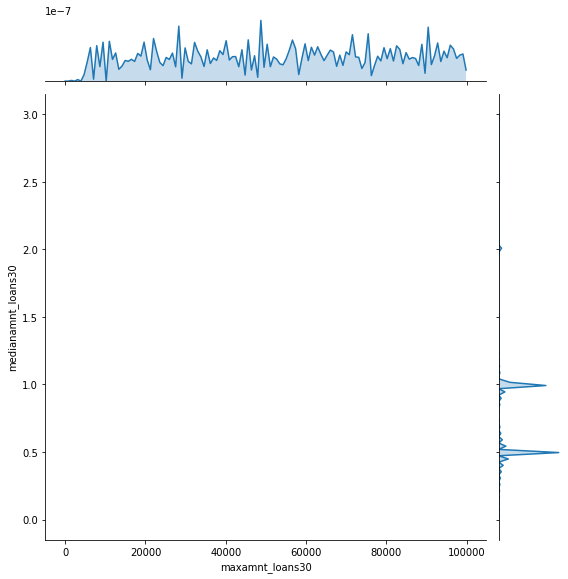

In [21]:
sns.jointplot('maxamnt_loans30','medianamnt_loans30',height=8,ratio=6,sapce=0.2,data=df,kind='kde')

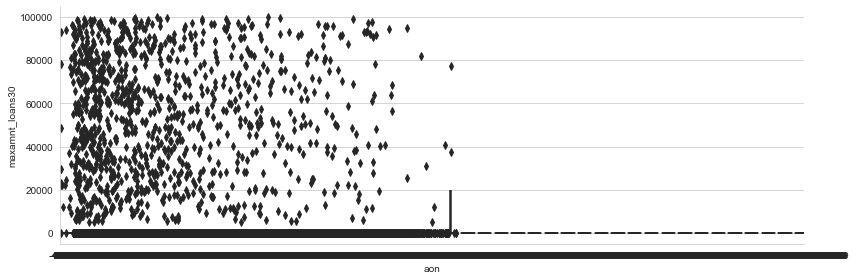

In [30]:
sns.set_style('whitegrid')
sns.catplot('aon','maxamnt_loans30',height=4,aspect=3,data=df,palette='YlOrRd',kind='box')

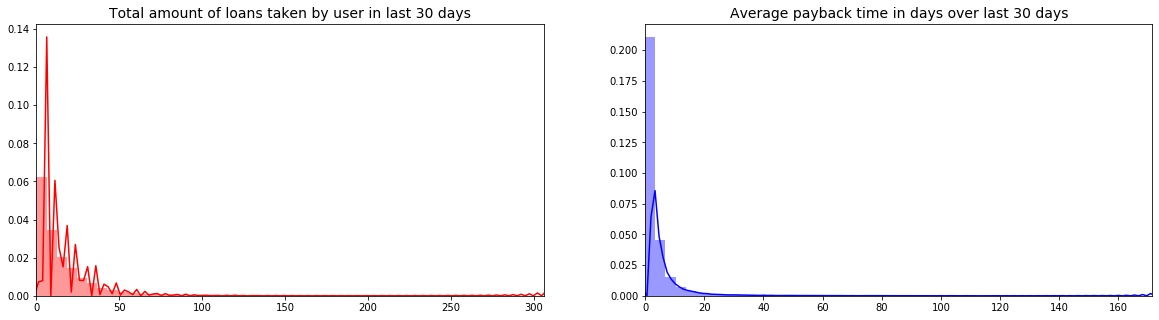

In [18]:
fig,ax = plt.subplots(1,2, figsize=(20,5))

amount_loan=df['amnt_loans30'].values
payback=df['payback30'].values

sns.distplot(amount_loan,ax=ax[0],color='r')
ax[0].set_title('Total amount of loans taken by user in last 30 days', fontsize=14)
ax[0].set_xlim([min(amount_loan),max(amount_loan)])

sns.distplot(payback,ax=ax[1],color='b')
ax[1].set_title('Average payback time in days over last 30 days', fontsize=14)
ax[1].set_xlim([min(payback),max(payback)])

plt.show()

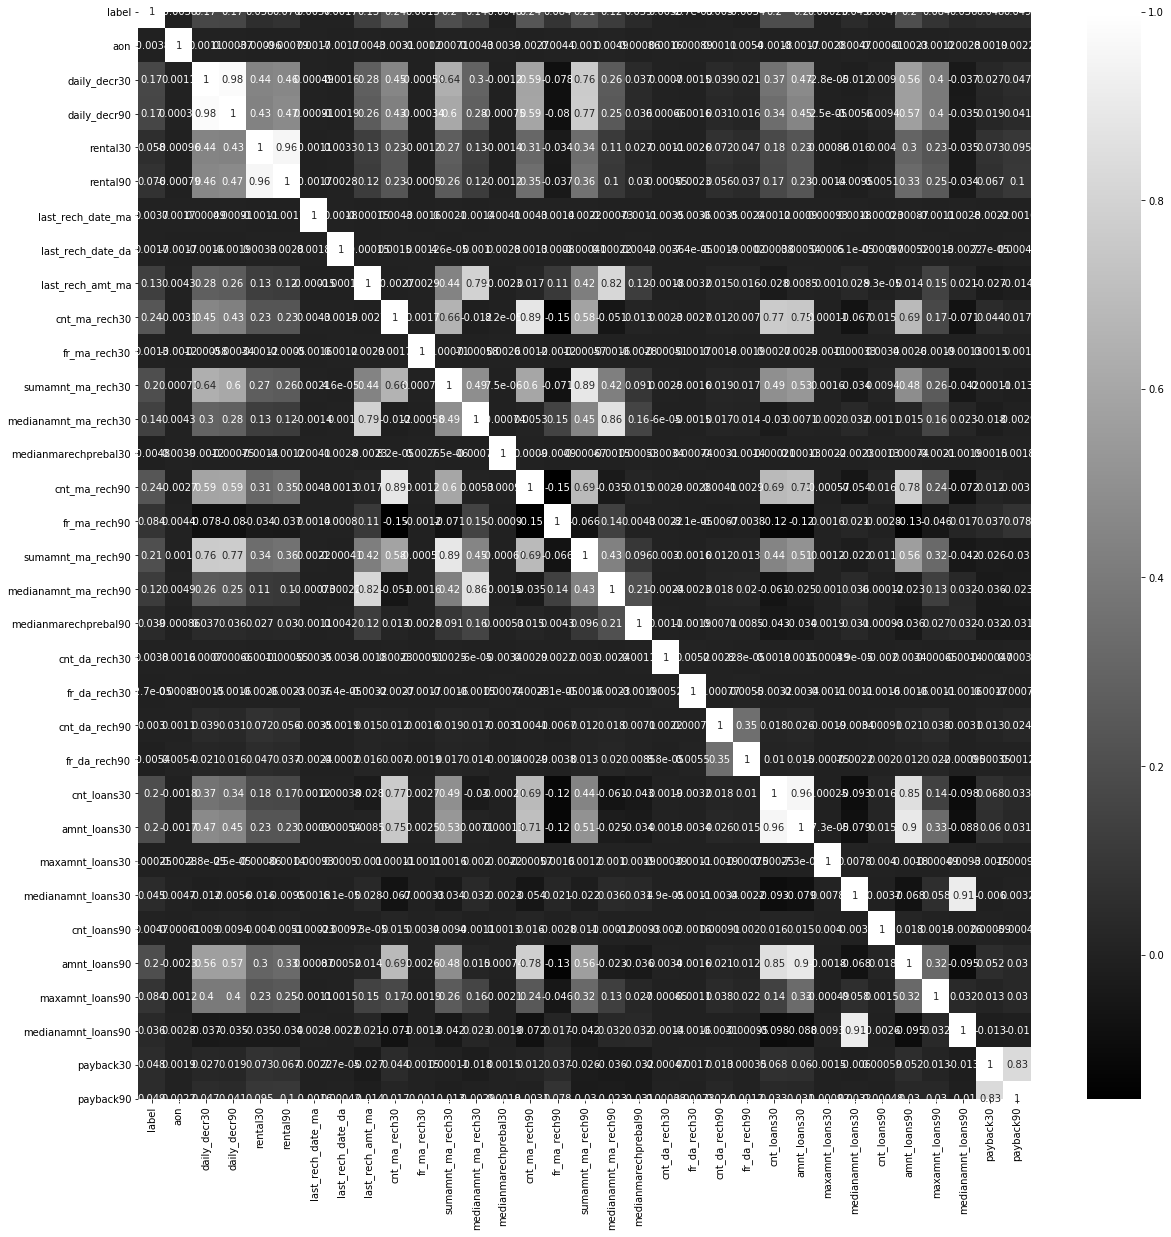

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='gist_gray',annot=True)

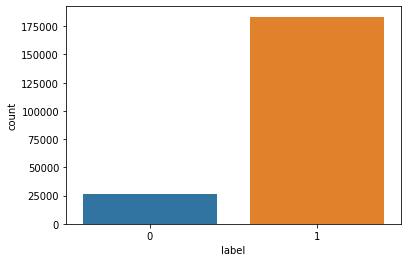

In [20]:
sns.countplot(df['label'])

In [21]:
print('Non-defaulter',round(df['label'].value_counts()[1]/len(df)*100,2),'% of this dataset')

print('Defaulter',round(df['label'].value_counts()[0]/len(df)*100,2),'% of this dataset')

Non-defaulter 87.52 % of this dataset
Defaulter 12.48 % of this dataset


In [22]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [23]:
df['pdate']=pd.to_datetime(df['pdate'],format='%Y-%m-%d')
df['pdate']=df['pdate'].map(dt.datetime.toordinal)
df.tail()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,736132
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,736127
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,736174
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,736170
209592,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,736152


In [24]:
df.drop('pcircle',axis=1,inplace=True)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
scale=LabelEncoder()

In [27]:
df['msisdn']=scale.fit_transform(df['msisdn'])
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,736165
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,736186
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,736195
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,736121
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,736137


In [28]:
def calculate_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return (vif)

In [29]:
calculate_vif(df)

,variables,VIF
0,label,1.114889
1,msisdn,1.000197
2,aon,1.000202
3,daily_decr30,29.103991
4,daily_decr90,31.997134
5,rental30,13.177389
6,rental90,13.833603
7,last_rech_date_ma,1.000156
8,last_rech_date_da,1.000132
9,last_rech_amt_ma,3.435471


In [30]:
temp=df.drop(['daily_decr30','daily_decr90','rental30','rental90','cnt_ma_rech30','sumamnt_ma_rech30','cnt_ma_rech90','sumamnt_ma_rech90','cnt_loans30','amnt_loans30','amnt_loans90','pdate'],axis=1)
calculate_vif(temp)

,variables,VIF
0,label,6.140222
1,msisdn,3.418259
2,aon,1.010989
3,last_rech_date_ma,1.004753
4,last_rech_date_da,1.004757
5,last_rech_amt_ma,5.918751
6,fr_ma_rech30,1.004678
7,medianamnt_ma_rech30,7.789172
8,medianmarechprebal30,1.004815
9,fr_ma_rech90,1.416279


In [31]:
x=df.drop('label',axis=1)
x.shape

(209593, 34)

In [32]:
pca=PCA(n_components=15)

In [33]:
y=df['label']
y.shape

(209593,)

In [34]:
x=pca.fit_transform(x)

In [35]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-7907.055995,-2340.192371,-3600.142041,-7017.377421,49703.627345,-17844.211798,3487.067829,-11227.367211,-1309.090361,-3332.082753,-267.701642,-281.466113,-965.789360,-229.919945,4.031535
1,-7380.259952,-7724.688781,-3153.002908,2941.078501,-47866.769615,7532.093747,-8016.700212,12.924853,-9280.786935,-3135.438647,-229.354112,-341.657825,-5100.776885,-7190.076412,-802.163722
2,-7649.970483,-1946.919610,-3598.903906,-7665.087279,55997.163020,-19517.292562,4229.826465,-14105.006601,-1240.819721,-1842.147679,-267.491782,-273.552373,-241.172273,-470.082130,-1.764671
3,-7888.214848,-5730.799959,-3336.374345,-747.580179,-11416.511788,-1933.812517,-3713.418170,-16453.575843,-513.114507,-2274.544699,-269.886941,-241.590185,1264.897320,775.674433,-72.197910
4,-7252.263049,-544.519765,-3764.294736,-10250.888066,81504.329795,-26143.577546,7235.005136,8105.150029,16405.437345,2425.107238,-290.193176,-321.789920,-1634.060499,1558.248824,776.557369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-7769.766343,-2414.750897,-3556.722975,-6766.781983,47136.137670,-17214.935532,3182.132428,-4960.409221,7464.719834,666.486657,-271.620373,-319.635273,-2028.217707,-2047.934846,619.219869
209589,-6992.717049,-9569.127400,-2923.838669,6411.169576,-82235.603951,16453.044195,-12064.747121,-12686.493893,1187.933017,261.200310,-263.581927,-239.721108,571.033594,1178.562613,20.842936
209590,-7149.177631,-3039.656959,-3550.220470,-5673.802036,36508.061574,-14433.455247,1928.064449,10671.898488,-5566.849810,2882.763711,-256.436697,-254.046814,471.438579,885.381115,-1052.893045
209591,-6382.404186,-6002.628946,-3242.945417,-104.141634,-18351.355393,-176.410885,-4509.668015,10463.950487,-1588.773577,-5993.252554,-263.353868,-282.708080,-1890.451230,1692.234619,-795.080521


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scale=StandardScaler()

In [38]:
x=scale.fit_transform(x)

In [39]:
from sklearn.utils import resample

In [40]:
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [41]:
df_majority = df[df.label==1]
df_minority = df[df.label==0]


df_minority_unsampled = resample(df_minority,replace=True,n_samples=183431,random_state=40)

df_upsampled=pd.concat([df_majority,df_minority_unsampled])

df_upsampled.label.value_counts()

1    183431
0    183431
Name: label, dtype: int64

In [42]:
df_majority_downsampled = resample(df_majority,replace=False,n_samples=26162,random_state=40)

df_downsampled=pd.concat([df_minority,df_majority_downsampled])

df_downsampled.label.value_counts()

1    26162
0    26162
Name: label, dtype: int64

In [43]:
x=df_upsampled.drop('label',axis=1)
y=df_upsampled.label

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=40)

In [45]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)

print(accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

0.7528819834860927
[[36578  7487]
 [14271 29711]]
              precision    recall  f1-score   support

           0       0.72      0.83      0.77     44065
           1       0.80      0.68      0.73     43982

    accuracy                           0.75     88047
   macro avg       0.76      0.75      0.75     88047
weighted avg       0.76      0.75      0.75     88047



In [45]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

print(accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

0.8577577884538939
[[42621  1444]
 [11080 32902]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     44065
           1       0.96      0.75      0.84     43982

    accuracy                           0.86     88047
   macro avg       0.88      0.86      0.86     88047
weighted avg       0.88      0.86      0.86     88047



In [46]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.9593398980090179
[[43975    90]
 [ 3490 40492]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     44065
           1       1.00      0.92      0.96     43982

    accuracy                           0.96     88047
   macro avg       0.96      0.96      0.96     88047
weighted avg       0.96      0.96      0.96     88047



In [47]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)

print(accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

0.9678353606596477
[[43985    80]
 [ 2752 41230]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     44065
           1       1.00      0.94      0.97     43982

    accuracy                           0.97     88047
   macro avg       0.97      0.97      0.97     88047
weighted avg       0.97      0.97      0.97     88047



In [48]:
y_prob=rfc.predict_proba(x_test)[:,1]

In [49]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

0.9970851061931646

In [50]:
def plot_roc(roc_auc):
    plt.figure(figsize=(8,8))
    plt.title('Area coverd by this telecome company')
    plt.plot(false_positive_rate,true_positive_rate,color='red',label='AUC= %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')

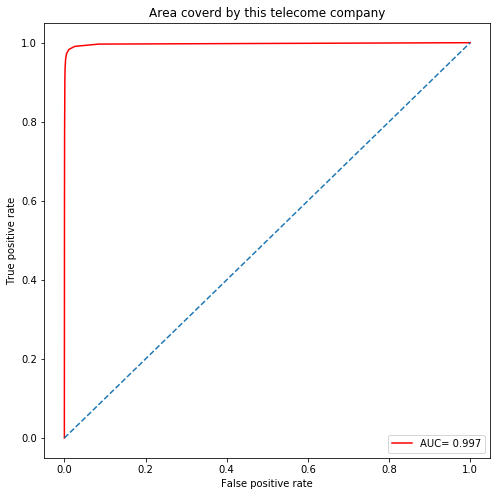

In [51]:
plot_roc(roc_auc)

In [55]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameter={'criterion':('gini','entropy')}
grid=GridSearchCV(rfc,parameter)
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini'}
0.9533310618151821


In [58]:
rfc=RandomForestClassifier(criterion='gini')
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)

print(accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

0.9676877122445966
[[43983    82]
 [ 2763 41219]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     44065
           1       1.00      0.94      0.97     43982

    accuracy                           0.97     88047
   macro avg       0.97      0.97      0.97     88047
weighted avg       0.97      0.97      0.97     88047



In [52]:
from sklearn.externals import joblib

In [53]:
joblib.dump(rfc,'MicroCreditFile.obj')

['MicroCreditFile.obj']